In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [51]:
df = pd.read_csv("data/movies_data.csv")
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,NaN,NaN,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,Crime,Drama,NaN,9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,Action,Crime,Drama,9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,Crime,Drama,NaN,9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,Crime,Drama,NaN,9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [3]:
df.shape

(1000, 16)

In [5]:
df.isna().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
Subgenre         105
Subgenre 1       354
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   str    
 1   Released_Year  1000 non-null   str    
 2   Certificate    899 non-null    str    
 3   Runtime        1000 non-null   int64  
 4   Genre          1000 non-null   str    
 5   Subgenre       895 non-null    str    
 6   Subgenre 1     646 non-null    str    
 7   IMDB_Rating    1000 non-null   float64
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   str    
 10  Star1          1000 non-null   str    
 11  Star2          1000 non-null   str    
 12  Star3          1000 non-null   str    
 13  Star4          1000 non-null   str    
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(2), str(11)
memory usage: 125.1 KB


In [7]:
df.describe(include='all')

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000,899,1000.000000,1000,895,646,1000.000000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,8.310000e+02
unique,999,100,16,NaN,14,20,19,NaN,NaN,548,660,841,891,939,NaN,NaN
top,Drishyam,2014,U,NaN,Drama,Drama,Drama,NaN,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,2,32,234,NaN,289,320,115,NaN,NaN,14,12,7,5,4,NaN,NaN
mean,NaN,NaN,NaN,122.891000,NaN,NaN,NaN,7.949300,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,6.803475e+07
std,NaN,NaN,NaN,28.093671,NaN,NaN,NaN,0.275491,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,1.097500e+08
min,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,7.600000,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,1.305000e+03
25%,NaN,NaN,NaN,103.000000,NaN,NaN,NaN,7.700000,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,3.253559e+06
50%,NaN,NaN,NaN,119.000000,NaN,NaN,NaN,7.900000,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,2.353089e+07
75%,NaN,NaN,NaN,137.000000,NaN,NaN,NaN,8.100000,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,8.075089e+07


# Top 1000 IMDB Movies – Exploratory Data Analysis

## Intoduction
This project explores the Top 1000 IMDB movies dataset to understand how movie ratings relate to audience engagement, revenue, and genre characteristics.

## Data Cleaning
- we handled missing values for the columns `Certificate` , `Subgenre` and `Subgenre 1`.
- we Converted the `Released_Year` column data type to integer.

Released_Year

In [8]:
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [9]:
df['Released_Year'].isna().sum()


np.int64(1)

In [10]:
df[df['Released_Year'].isna()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,Subgenre,Subgenre 1,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,NaN,U,140,Adventure,Drama,History,7.6,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [11]:
df['Released_Year'] = df['Released_Year'].astype('Int64')

Certificate

In [12]:
df['Certificate'].sample(10)

978      U
927     UA
725     UA
626     UA
390    NaN
104     UA
333      U
494      R
15       A
802      A
Name: Certificate, dtype: str

In [13]:
df['Certificate'] = df['Certificate'].fillna('Unknown')

In [14]:
df['Certificate'].isna().sum()

np.int64(0)

In [15]:
df['Certificate'].value_counts()

Certificate
U           234
A           197
UA          175
R           146
Unknown     101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64

Subgenre

In [16]:
df['Subgenre'].head(10)

0           NaN
1         Drama
2         Crime
3         Drama
4         Drama
5     Adventure
6         Drama
7         Drama
8     Adventure
9           NaN
Name: Subgenre, dtype: str

In [17]:
df['Subgenre'].isna().sum()

np.int64(105)

In [18]:
df['Subgenre'].value_counts()

Subgenre
Drama        320
Adventure    113
Crime         84
Romance       53
Comedy        43
Mystery       41
Thriller      37
Family        26
Sci-Fi        23
Music         21
Biography     20
War           18
Horror        18
Fantasy       18
History       18
Action        17
Film-Noir     10
Western        6
Sport          6
Musical        3
Name: count, dtype: int64

In [19]:
df['Subgenre'] = df['Subgenre'].fillna('Unknown')

In [20]:
df['Subgenre'] = df['Subgenre'].str.strip()

Subgenre 1

In [21]:
df['Subgenre 1'].head(10)

0         NaN
1         NaN
2       Drama
3         NaN
4         NaN
5       Drama
6         NaN
7     History
8      Sci-Fi
9         NaN
Name: Subgenre 1, dtype: str

In [22]:
df['Subgenre 1'].isna().sum()

np.int64(354)

In [23]:
df['Subgenre 1'].value_counts()

Subgenre 1
Drama        115
Thriller      99
Romance       72
Fantasy       46
Mystery       46
Sci-Fi        44
History       38
Comedy        35
War           33
Family        28
Crime         18
Music         14
Musical       14
Sport         13
Adventure     11
Western       10
Film-Noir      6
Horror         3
Biography      1
Name: count, dtype: int64

In [24]:
df['Subgenre 1'] = df['Subgenre 1'].fillna('Unkown')

In [25]:
df['Subgenre 1'] = df['Subgenre 1'].str.strip()

In [26]:
df['Gross_Millions'] = df['Gross'] / 1_000_000

In [27]:
df = df.rename(columns={'Runtime': 'Runtime_Minutes'})

In [28]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime_Minutes',
       'Genre', 'Subgenre', 'Subgenre 1', 'IMDB_Rating', 'Meta_score',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'Gross_Millions'],
      dtype='str')

## Analysis

### Do higher-rated movies actually make more money?

In [29]:
df_revenue = df.dropna(subset=['Gross'])

In [30]:
df_revenue.shape

(831, 17)

In [31]:
df_revenue[['IMDB_Rating', 'Gross']].corr()

,IMDB_Rating,Gross
IMDB_Rating,1.000000,0.095923
Gross,0.095923,1.000000


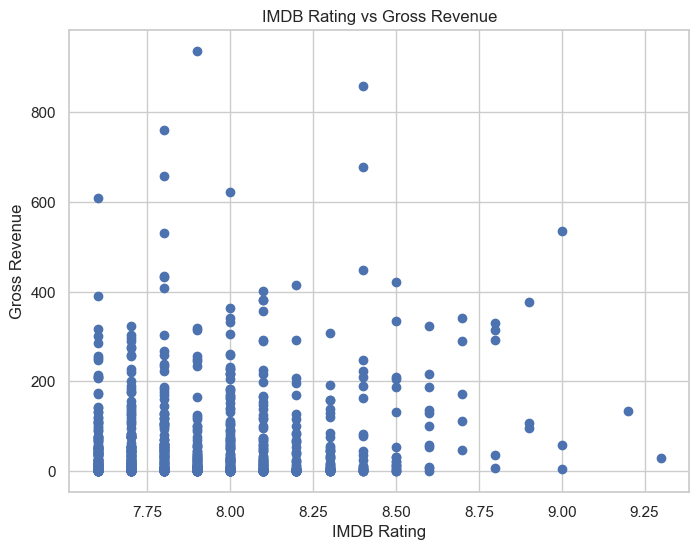

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(df_revenue['IMDB_Rating'], df_revenue['Gross_Millions'])
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue')
plt.title('IMDB Rating vs Gross Revenue')
plt.show()

### Do movies with higher IMDB ratings make more money on average?

In [33]:
df['IMDB_Rating'].value_counts().sort_index()

IMDB_Rating
7.6    123
7.7    157
7.8    151
7.9    106
8.0    141
8.1    127
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: count, dtype: int64

In [34]:
df_revenue['rating_group'] = pd.cut( df_revenue['IMDB_Rating'], bins=[7.5, 8.1, 8.6, 9.3], labels=['Lower (7.6-8.1)','Mid (8.2, 8.6)', 'Top (8.7-9.3)'])

In [35]:
df_revenue[['IMDB_Rating', 'rating_group']].sample(10)

,IMDB_Rating,rating_group
585,7.8,Lower (7.6-8.1)
753,7.7,Lower (7.6-8.1)
892,7.6,Lower (7.6-8.1)
506,7.9,Lower (7.6-8.1)
243,8.1,Lower (7.6-8.1)
48,8.5,"Mid (8.2, 8.6)"
739,7.7,Lower (7.6-8.1)
900,7.6,Lower (7.6-8.1)
699,7.8,Lower (7.6-8.1)
223,8.1,Lower (7.6-8.1)


In [36]:
df_revenue['rating_group'].value_counts()

rating_group
Lower (7.6-8.1)    668
Mid (8.2, 8.6)     145
Top (8.7-9.3)       18
Name: count, dtype: int64

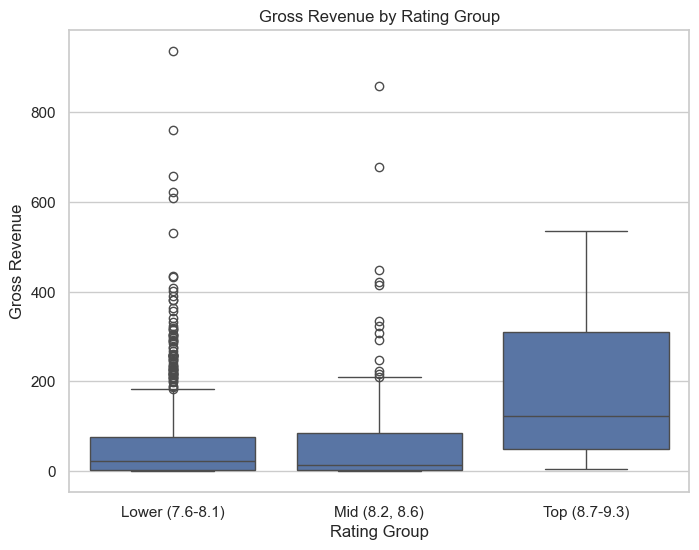

In [37]:
plt.figure(figsize=(8,6))
sns.boxplot(x='rating_group', y='Gross_Millions', data=df_revenue)

plt.title("Gross Revenue by Rating Group")
plt.xlabel("Rating Group")
plt.ylabel("Gross Revenue")
plt.show()

Higher-rated movies do not consistently make more money. The apparent higher revenue in the top-rated group is influenced by a very small number of movies, making the result unreliable.

### Do movies with more votes tend to have higher ratings?

In [38]:
df[['No_of_Votes', 'IMDB_Rating']].corr()

,No_of_Votes,IMDB_Rating
No_of_Votes,1.000000,0.494979
IMDB_Rating,0.494979,1.000000


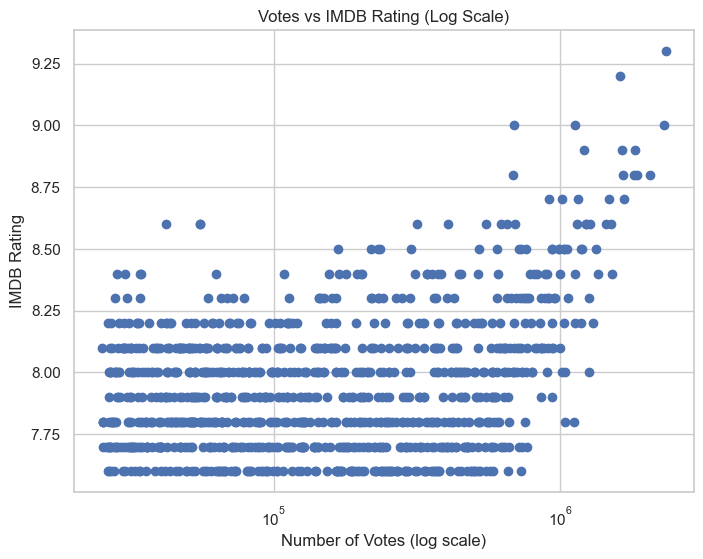

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(df['No_of_Votes'], df['IMDB_Rating'])
plt.xscale('log')
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("IMDB Rating")
plt.title("Votes vs IMDB Rating (Log Scale)")
plt.show()

Votes and ratings have a moderate positive relationship, but votes are not the main factor driving ratings.

### Do higher-rated movies receive more votes?

In [40]:
df['rating_group'] = pd.cut( df['IMDB_Rating'], bins=[7.5, 8.1, 8.6, 9.3], labels=['Lower (7.6-8.1)','Mid (8.2, 8.6)', 'Top (8.7-9.3)'])

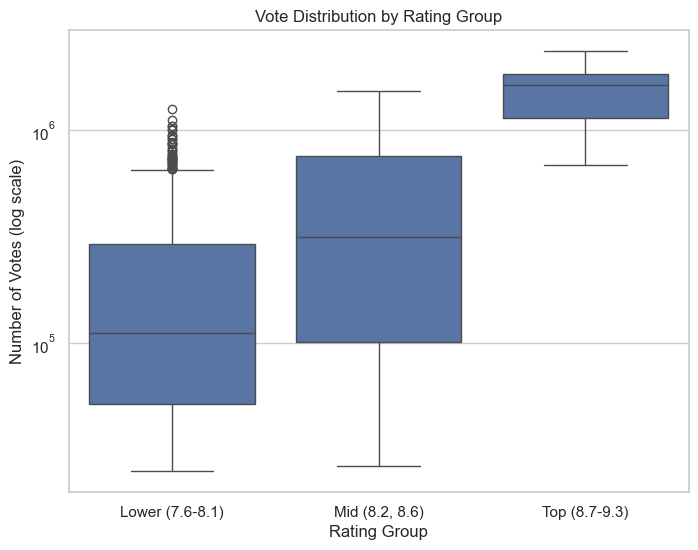

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(x='rating_group' , y='No_of_Votes', data=df)

plt.yscale('log')
plt.title("Vote Distribution by Rating Group")
plt.xlabel("Rating Group")
plt.ylabel("Number of Votes (log scale)")
plt.show()


In [42]:
df.groupby('rating_group')['No_of_Votes'].median()


rating_group
Lower (7.6-8.1)     111483.0
Mid (8.2, 8.6)      315744.0
Top (8.7-9.3)      1631562.5
Name: No_of_Votes, dtype: float64

There is a moderate positive relationship between rating and number of votes. Higher-rated movies generally receive more audience votes.

### The top 5 most voted movies

In [43]:
top_voted = df.sort_values('No_of_Votes', ascending=False)

In [44]:
top_voted[['Series_Title', 'Released_Year', 'IMDB_Rating', 'No_of_Votes']].head(5)


,Series_Title,Released_Year,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,1994,9.3,2343110
2,The Dark Knight,2008,9.0,2303232
8,Inception,2010,8.8,2067042
9,Fight Club,1999,8.8,1854740
6,Pulp Fiction,1994,8.9,1826188


The top 5 most voted movies all have high ratings. This shows that popular movies are often highly rated as well.

### Which genres are most common in the Top 1000 movies?

In [45]:
df['Genre'].value_counts()

Genre
Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: count, dtype: int64

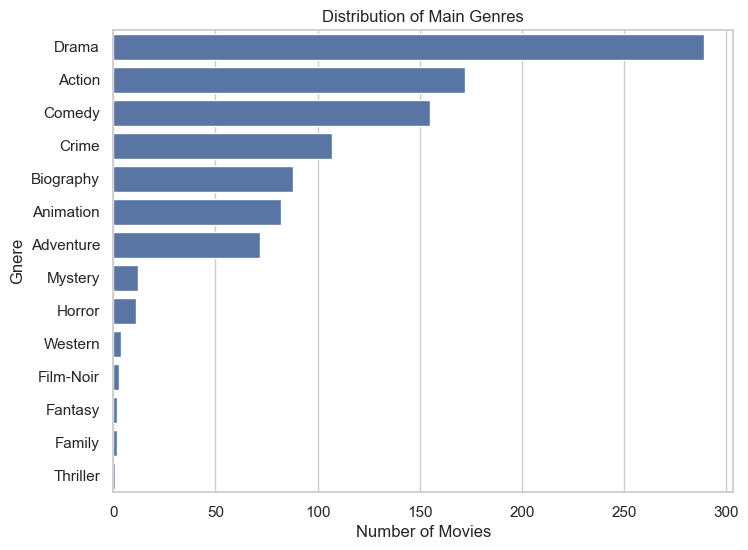

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)

plt.title('Distribution of Main Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Gnere')
plt.show()

Drama is the most common genre in the Top 1000 IMDB movies, followed by genres such as Crime and Action.

### Which genres receive the most audience engagement (votes)?

In [47]:
genre_votes = df.groupby('Genre')['No_of_Votes'].mean().sort_values(ascending=False)

In [48]:
genre_votes

Genre
Action       420246.581395
Mystery      350250.333333
Horror       340232.363636
Western      322416.250000
Adventure    313557.819444
Crime        313398.271028
Family       275610.500000
Biography    272805.045455
Animation    268032.073171
Drama        212343.612457
Comedy       178195.658065
Film-Noir    122405.000000
Fantasy       73111.000000
Thriller      27733.000000
Name: No_of_Votes, dtype: float64

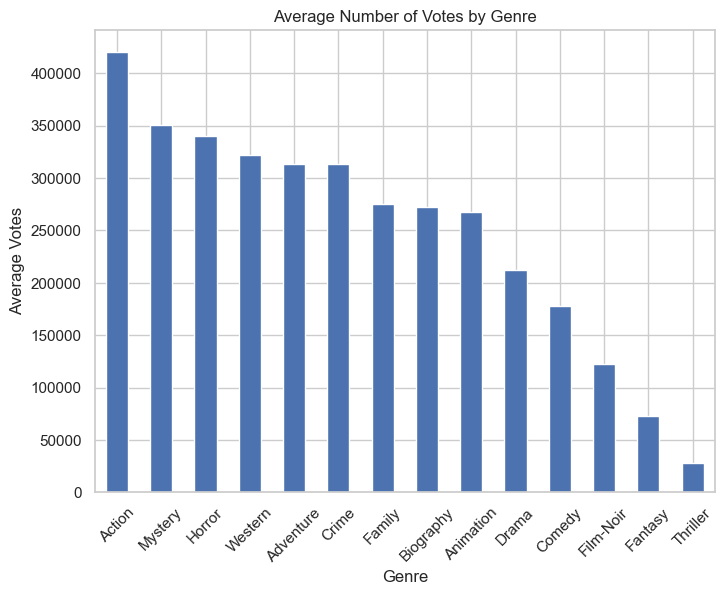

In [49]:
plt.figure(figsize=(8,6))
genre_votes.plot(kind='bar')

plt.title("Average Number of Votes by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Votes")
plt.xticks(rotation=45)
plt.show()

Genres such as action and mystery tend to receive the highest average number of votes.